# Working environment

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Allowing modules autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Pandas options
pd.options.display.max_columns = 100

In [3]:
# Importing data
data = pd.read_pickle('Seattle-cleaned.pkl')

In [4]:
data.sample(10)

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,ZipCode
419,NonResidential,Retail Store,5,NORTH,1950,1,2,302812,0,302812,Retail Store,302812.0,NaN,NaN,NaN,NaN,97.0,23.600000,23.000000,64.100000,62.300000,7133767.0,6.962648e+06,0.000000e+00,1.671351e+06,5702886.0,14311.000000,1431117.0,0.0,115.76,0.30,False,Compliant,NaN,-122.325776,47.705930,401 NE NORTHGATE WAY,98125.0
3571,NonResidential,Large Office,7,DOWNTOWN,1907,1,8,201480,0,201480,Office,161762.0,Retail Store,29094.0,Non-Refrigerated Warehouse,10624.0,91.0,44.299999,47.200001,123.500000,129.399994,8921778.0,9.510490e+06,1.619967e+06,2.140038e+06,7301810.0,0.000000,0.0,NaN,175.95,0.87,False,Compliant,NaN,-122.332610,47.604710,810 Third Avenue,98104.0
1263,NonResidential,Small- and Mid-Sized Office,3,EAST,1910,1,3,73549,0,73549,NaN,NaN,NaN,NaN,NaN,NaN,90.0,38.400000,47.700000,67.100000,76.900000,2823242.0,3.508803e+06,0.000000e+00,2.763940e+05,943095.0,18802.000000,1880186.0,0.0,106.43,1.39,False,Compliant,NaN,-122.322006,47.612123,1111 HARVARD AVE,98122.0
2043,SPS-District K-12,K-12 School,1,DELRIDGE,1970,1,1,41526,0,41526,K-12 School,41526.0,NaN,NaN,NaN,NaN,72.0,49.100000,63.500000,95.700000,114.700000,2037693.0,2.636908e+06,0.000000e+00,2.573250e+05,878029.0,11597.000000,1159700.0,0.0,67.71,1.54,True,Compliant,NaN,-122.358963,47.539459,1812 SW MYRTLE ST,98106.0
3517,SPS-District K-12,K-12 School,4,NORTHEAST,2006,1,3,269297,0,269297,K-12 School,269297.0,NaN,NaN,NaN,NaN,80.0,39.000000,41.599998,96.800003,99.599998,10498344.0,1.120820e+07,0.000000e+00,2.111361e+06,7203965.0,32943.785160,3294379.0,NaN,225.19,0.84,True,Error - Correct Default Data,NaN,-122.312810,47.677230,1410 N.E. 66th St.,98115.0
3500,Campus,Large Office,1,GREATER DUWAMISH,1980,14,2,334368,31874,302494,Office,240984.0,Laboratory,72963.0,Other - Utility,16766.0,NaN,159.899994,161.899994,451.200012,453.299988,53466684.0,5.413607e+07,0.000000e+00,1.328294e+07,45321378.0,81453.000000,8145300.0,NaN,748.55,2.24,False,Compliant,NaN,-122.312340,47.524290,1420 S Trenton,98108.0
3158,NonResidential,Supermarket / Grocery Store,7,MAGNOLIA / QUEEN ANNE,2006,1,4,45980,0,45980,Supermarket/Grocery Store,45980.0,NaN,NaN,NaN,NaN,81.0,182.300000,195.700000,430.500000,440.100000,8381744.0,9.000402e+06,0.000000e+00,1.541778e+06,5260765.0,31212.000000,3121197.0,0.0,202.44,3.91,False,Compliant,NaN,-122.389619,47.652291,3601 26TH PL W,98199.0
3508,NonResidential,Hospital,3,EAST,2000,9,8,1158691,0,1158691,Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,2.966717e+08,1.225750e+08,4.943834e+07,168683602.0,18321.291020,1832129.0,NaN,10734.57,9.26,False,Compliant,NaN,-122.323770,47.603990,325 9th Ave.,98104.0
3660,NonResidential,Small- and Mid-Sized Office,5,NORTH,1974,1,5,74880,0,74880,Office,71751.0,Parking,0.0,NaN,NaN,56.0,71.599998,77.099998,224.699997,242.100006,5134607.5,5.531460e+06,0.000000e+00,1.504867e+06,5134607.0,0.000000,0.0,NaN,35.80,0.48,False,Compliant,NaN,-122.326590,47.701050,155 NE 100th Street,98125.0
6571,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1962,0,1,29000,0,29000,Other,25100.0,NaN,NaN,NaN,NaN,NaN,83.400002,90.800003,235.199997,245.899994,2429214.0,2.642232e+06,0.000000e+00,4.703133e+05,1604709.0,8245.049805,824505.0,NaN,54.98,1.90,False,Compliant,NaN,-122.352510,47.620820,

# GHG & Energy use per building type

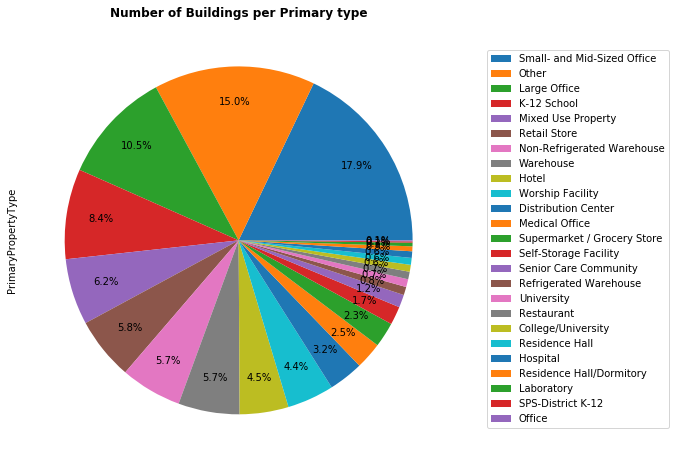

In [5]:
# Building types
s = data['PrimaryPropertyType'].value_counts()
plt.figure(figsize = (20,8))
s.plot.pie(labels = None, autopct = lambda x : str(round(x,1))+"%", pctdistance = 0.8)
plt.title('Number of Buildings per Primary type', fontweight = 'bold')
plt.legend(s.index, loc = 'best', bbox_to_anchor = (1.5,0.95))
plt.show()

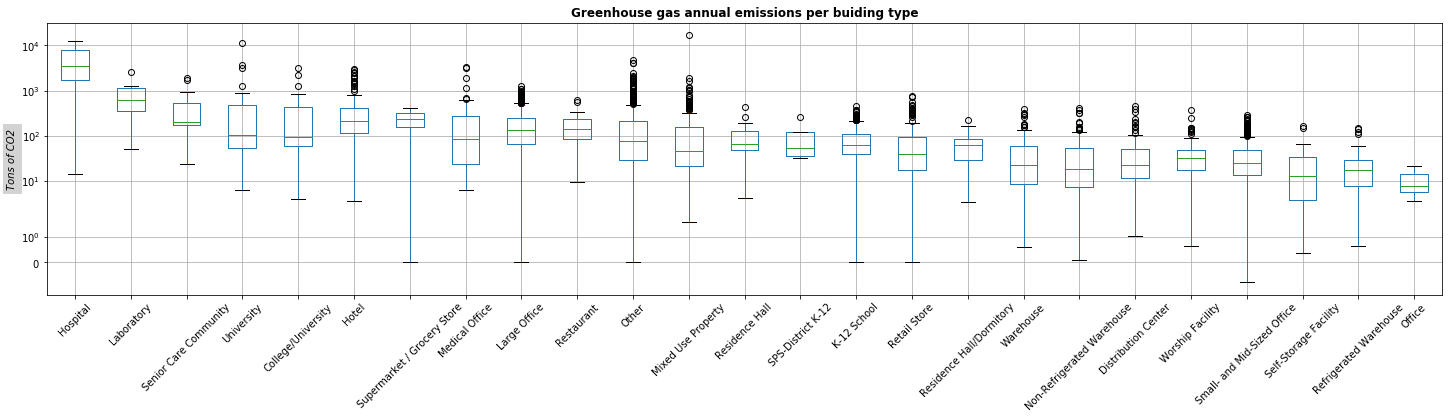

In [6]:
df_ = data[['PrimaryPropertyType', 'GHGEmissions(MetricTonsCO2e)']].pivot(
    columns = 'PrimaryPropertyType', 
    values = 'GHGEmissions(MetricTonsCO2e)'
)

df_ = df_.reindex(columns = df_.describe().T.sort_values(by = '75%', ascending = False).index.tolist())

df_.plot(kind = 'box', figsize = (25,5), showfliers = True)
plt.gca().set_yscale('symlog')
plt.grid(True)
plt.xticks(rotation = 45)

plt.title('Greenhouse gas annual emissions per buiding type', fontweight = 'bold')
plt.ylabel('Tons of CO2', fontstyle = 'italic', backgroundcolor = 'lightgrey')
plt.show()

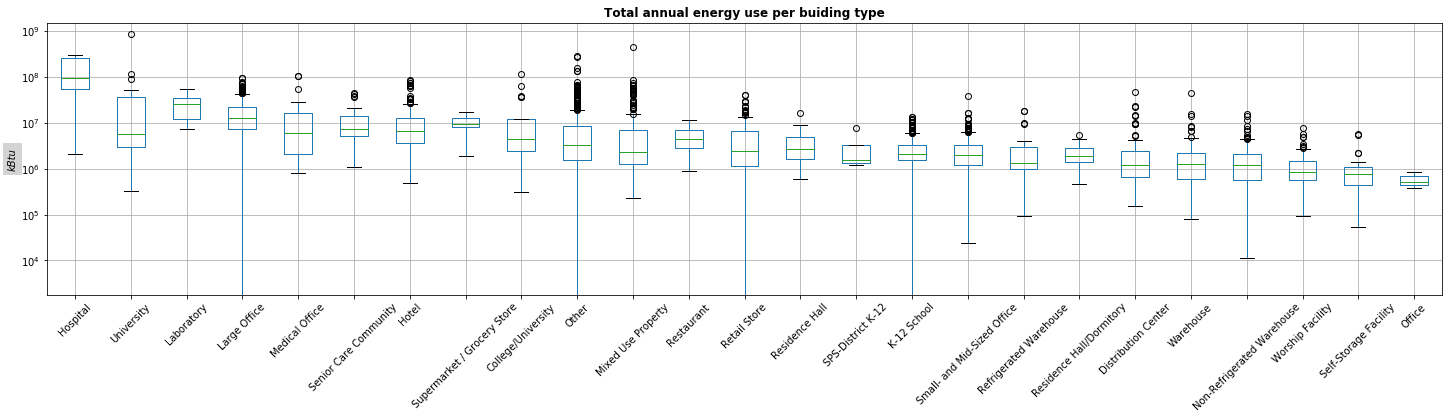

In [7]:
df_ = data[['PrimaryPropertyType', 'SiteEnergyUse(kBtu)']].pivot(
    columns = 'PrimaryPropertyType', 
    values = 'SiteEnergyUse(kBtu)'
)

df_ = df_.reindex(columns = df_.describe().T.sort_values(by = '75%', ascending = False).index.tolist())

df_.plot(kind = 'box', figsize = (25,5), showfliers = True)
plt.ylim(1.8 * 10**3, 1.5 * 10**9)
plt.gca().set_yscale('symlog')
plt.grid(True)
plt.xticks(rotation = 45)

plt.title('Total annual energy use per buiding type', fontweight = 'bold')
plt.ylabel('kBtu', fontstyle = 'italic', backgroundcolor = 'lightgrey')
plt.show()

# GHG & Energy use per neighborhood

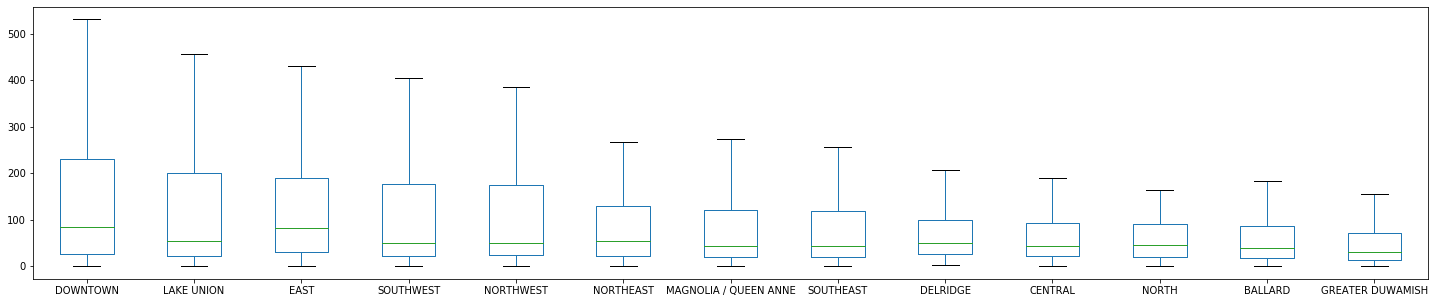

In [8]:
df_ = data[['Neighborhood', 'GHGEmissions(MetricTonsCO2e)']].pivot(
    columns = 'Neighborhood', 
    values = 'GHGEmissions(MetricTonsCO2e)'
)

df_ = df_.reindex(columns = df_.describe().T.sort_values(by = '75%', ascending = False).index)

df_.plot(kind = 'box', figsize = (25,5), showfliers = False)
plt.show()

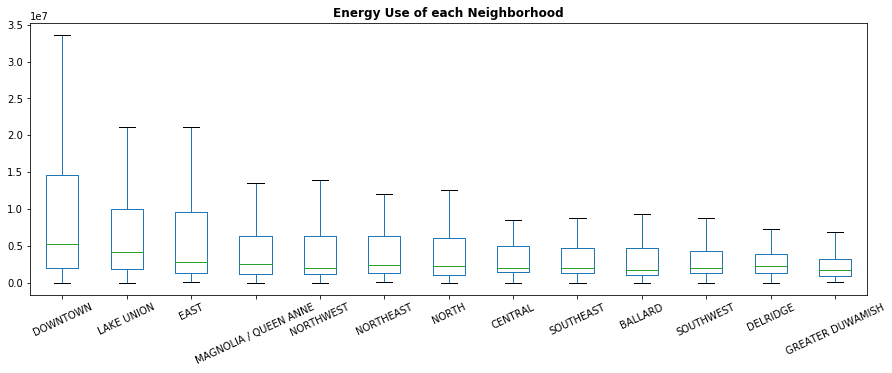

In [23]:
df_ = data[['Neighborhood', 'SiteEnergyUse(kBtu)']].pivot(
    columns = 'Neighborhood', 
    values = 'SiteEnergyUse(kBtu)'
)

df_ = df_.reindex(columns = df_.describe().T.sort_values(by = '75%', ascending = False).index)

df_.plot(kind = 'box', figsize = (15,5), showfliers = False)
plt.title('Energy Use of each Neighborhood', fontweight = 'bold')
plt.xticks(rotation = 25)
plt.show()

## Map

C:\Users\alexa_000\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexa_000\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


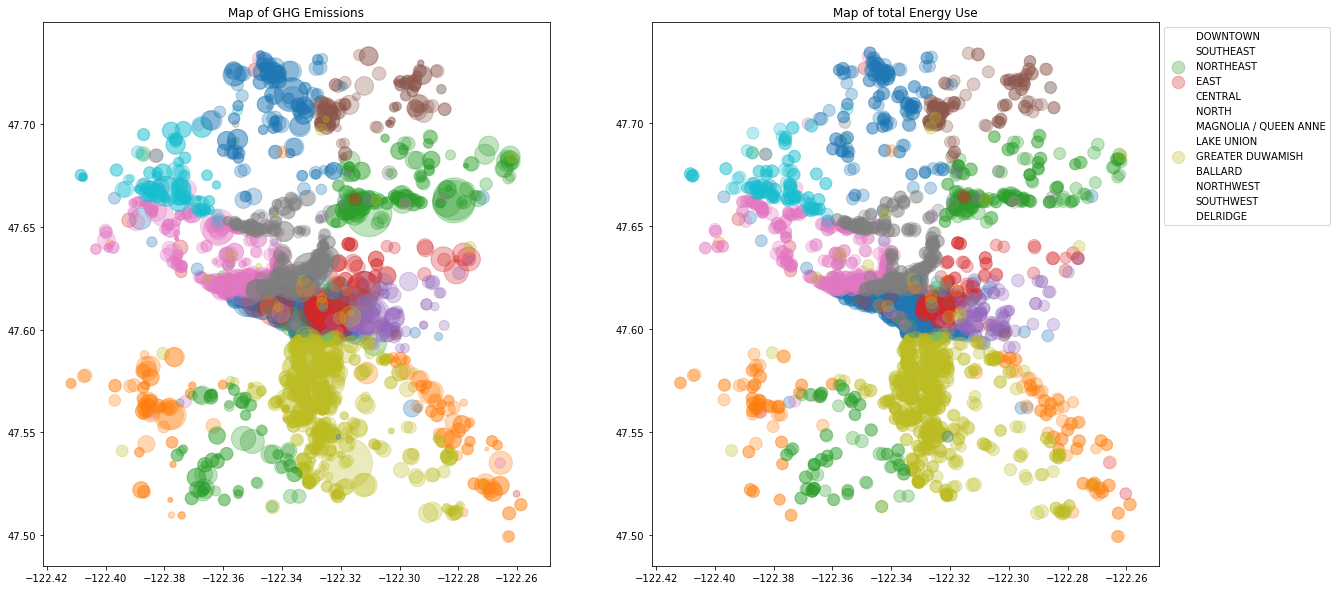

In [10]:
l_neighb = data['Neighborhood'].unique().tolist()

plt.figure(figsize = (20,10))

plt.subplot(121)
for neighb in l_neighb:
    df_neigh = data[data['Neighborhood'] == neighb]
    plt.scatter(
        df_neigh['Longitude'],
        df_neigh['Latitude'],
        label = neighb,
        s = 20*(df_neigh['GHGEmissions(MetricTonsCO2e)'])**0.5,
        alpha= 0.3
    )
plt.title('Map of GHG Emissions')
    
plt.subplot(122)
for neighb in l_neighb:
    df_neigh = data[data['Neighborhood'] == neighb]
    plt.scatter(
        df_neigh['Longitude'],
        df_neigh['Latitude'],
        label = neighb,
        s = 10*np.log(df_neigh['SiteEnergyUse(kBtu)']),
        alpha= 0.3
    )
plt.title('Map of total Energy Use')
plt.legend(loc = 'best', bbox_to_anchor = (1,1))
    
plt.show()

# Per YearBuilt

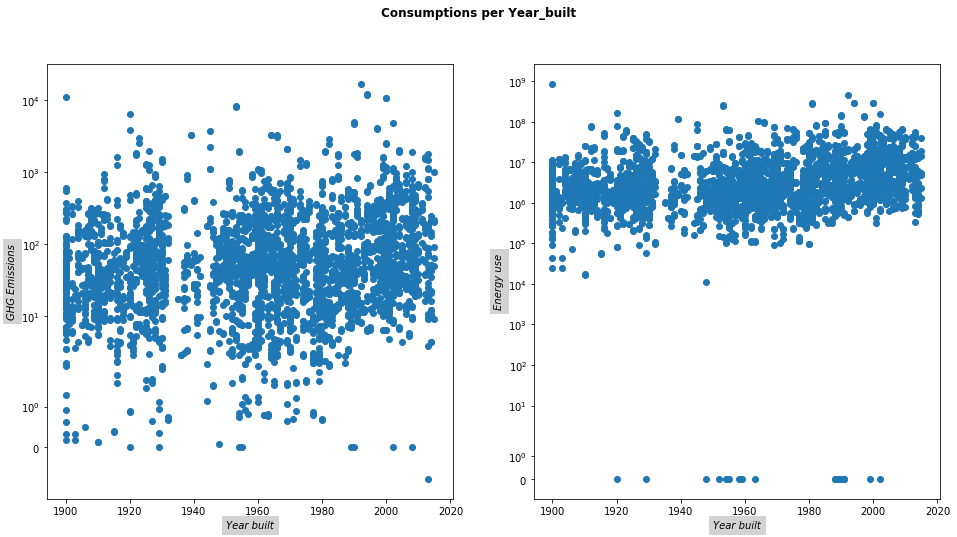

In [26]:
plt.figure(figsize = (16,8))
plt.suptitle('Consumptions per Year_built', fontweight = 'bold')
plt.subplot(121)
plt.scatter(
    data['YearBuilt'],
    data['GHGEmissions(MetricTonsCO2e)']
)
plt.gca().set_yscale('symlog')
plt.xlabel('Year built', backgroundcolor = 'lightgrey', fontstyle = 'italic')
plt.ylabel('GHG Emissions', backgroundcolor = 'lightgrey', fontstyle = 'italic')

plt.subplot(122)
plt.scatter(
    data['YearBuilt'],
    data['SiteEnergyUse(kBtu)']
)
plt.gca().set_yscale('symlog')
plt.xlabel('Year built', backgroundcolor = 'lightgrey', fontstyle = 'italic')
plt.ylabel('Energy use', backgroundcolor = 'lightgrey', fontstyle = 'italic')

plt.show()

In [12]:
df_ = data[['YearBuilt','GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']].dropna()
df_.corr()[['YearBuilt']]

,YearBuilt
YearBuilt,1.000000
GHGEmissions(MetricTonsCO2e),0.065488
SiteEnergyUse(kBtu),0.095714


# Link between consumption and GFA

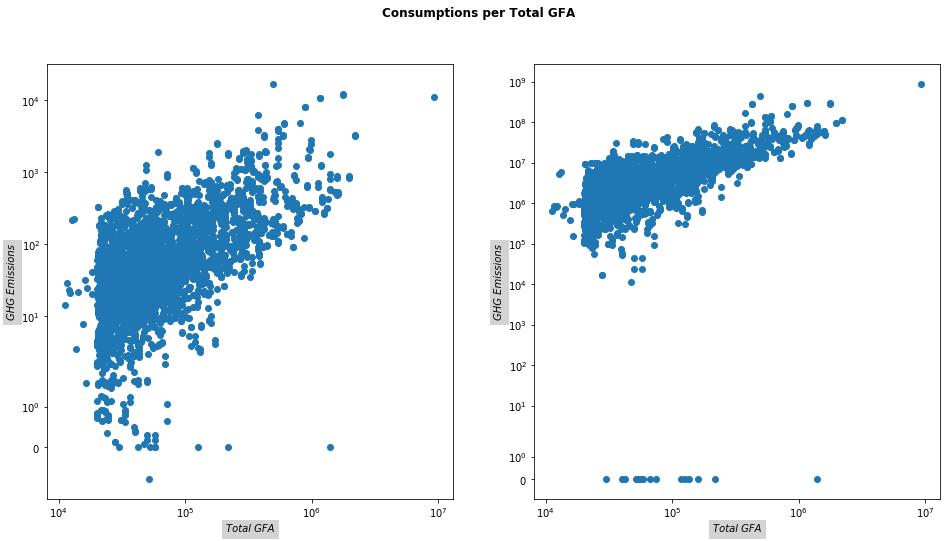

In [27]:
plt.figure(figsize = (16,8))
plt.subplot(121)
plt.scatter(
    data['PropertyGFATotal'],
    data['GHGEmissions(MetricTonsCO2e)']
)
plt.gca().set_xscale('symlog')
plt.gca().set_yscale('symlog')
plt.xlabel('Total GFA', backgroundcolor = 'lightgrey', fontstyle = 'italic')
plt.ylabel('GHG Emissions', backgroundcolor = 'lightgrey', fontstyle = 'italic')

plt.subplot(122)
plt.scatter(
    data['PropertyGFATotal'],
    data['SiteEnergyUse(kBtu)']
)
plt.gca().set_xscale('symlog')
plt.gca().set_yscale('symlog')
plt.xlabel('Total GFA', backgroundcolor = 'lightgrey', fontstyle = 'italic')
plt.ylabel('GHG Emissions', backgroundcolor = 'lightgrey', fontstyle = 'italic')

plt.suptitle('Consumptions per Total GFA', fontweight = 'bold')
plt.show()

In [14]:
df_ = data[['PropertyGFATotal','GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']].dropna()
df_.corr()[['PropertyGFATotal']]

,PropertyGFATotal
PropertyGFATotal,1.000000
GHGEmissions(MetricTonsCO2e),0.519879
SiteEnergyUse(kBtu),0.769145


# Energy Star Score

In [15]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus',
       'Outlier', 'Longitude', 'Latitude', 'Address', 'ZipCode'],
      dtype='object')

In [16]:
data['ENERGYSTARScore'].unique()

array([ 65.,  51.,  18.,   1.,  67.,  nan,  25.,  46.,  48.,  32.,  39.,
        56.,  14.,  30.,  83.,  96.,  85.,  20.,  57.,  60.,  80.,  94.,
        77.,  91.,  88.,  93.,  95.,  68.,  79.,  99.,  86.,  84.,  81.,
        50.,  24.,  40.,  89.,  72.,  52.,  43., 100.,  71.,  75.,  97.,
        28.,  92.,  62.,  90.,  19.,  98.,  13.,  74.,  82.,  76.,  31.,
        73.,  61.,  55.,  45.,  63.,  49.,  87.,   7.,  23.,  34.,  59.,
        36.,  70.,  66.,  17.,  22.,  11.,  44.,   4.,  54.,   8.,  35.,
        27.,  78.,   6.,  16.,  69.,  29.,  47.,  33.,  38.,  58.,  64.,
         3.,  53.,   2.,  10.,  21.,  42.,  26.,  37.,   9.,  15.,  12.,
         5.,  41.])

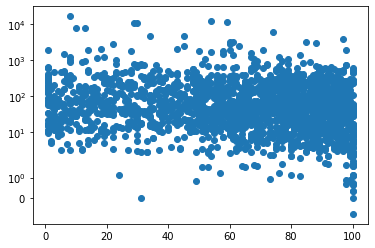

In [17]:
plt.scatter(
    data['ENERGYSTARScore'],
    data['GHGEmissions(MetricTonsCO2e)']
)

plt.gca().set_yscale('symlog')

In [18]:
l_type = data['PrimaryPropertyType'].unique().tolist()
len(l_type)

25

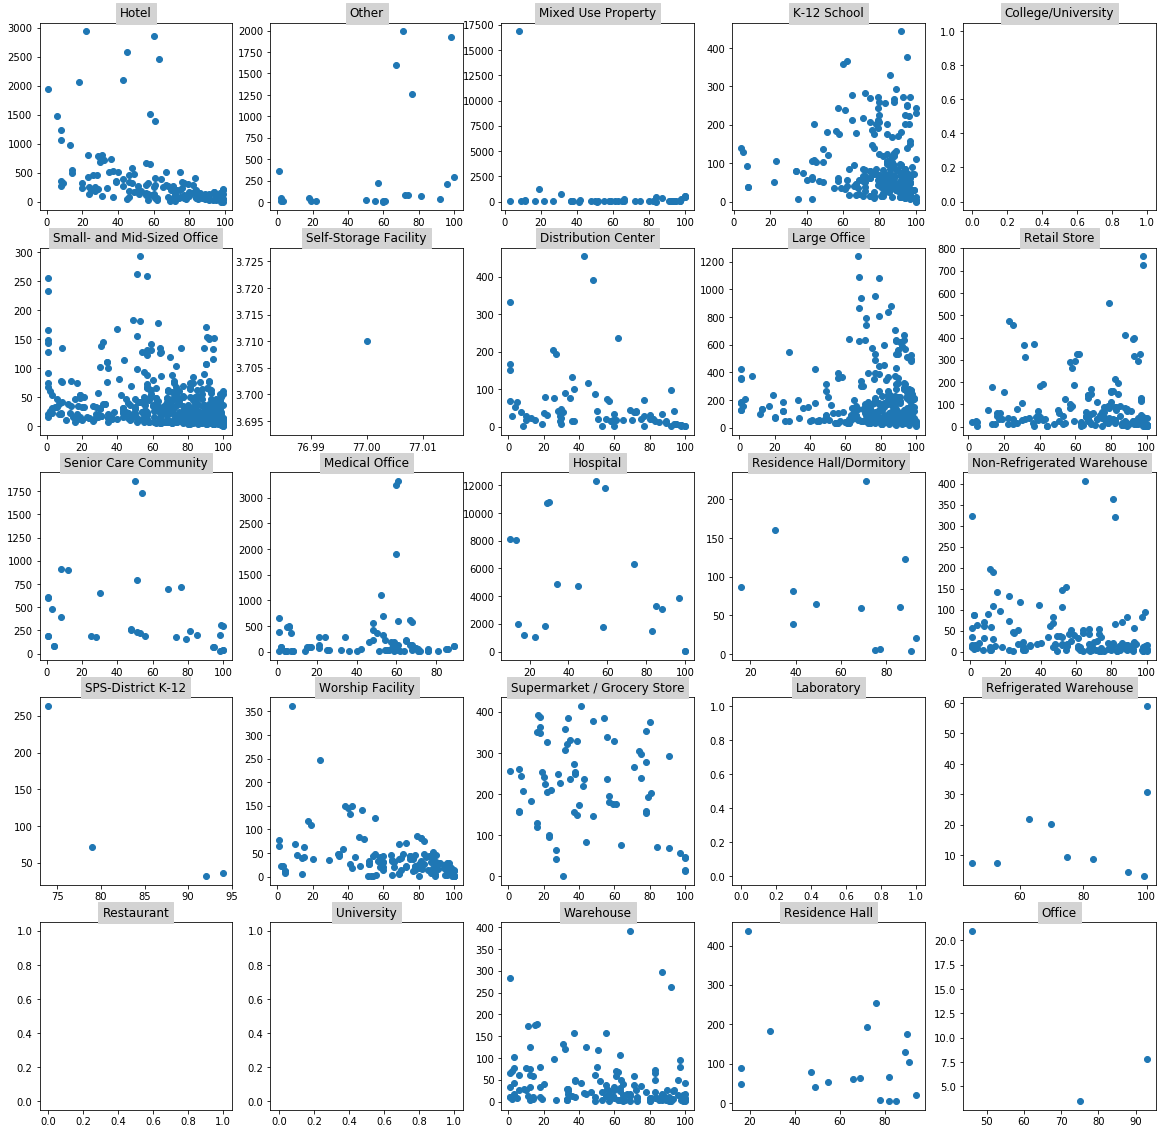

In [19]:
plt.figure(figsize = (20,20))
for p_type in l_type:
    plt.subplot(5,5, 1 + l_type.index(p_type))
    df_ = data[data['PrimaryPropertyType'] == p_type]
    plt.scatter(df_['ENERGYSTARScore'], df_['GHGEmissions(MetricTonsCO2e)'])
    plt.title(p_type, backgroundcolor = 'lightgrey')
plt.show()